In [1]:
import numpy
import matplotlib.pyplot as plt_train
import matplotlib.pyplot as plt_test
from pandas import read_csv
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix

Using TensorFlow backend.


In [9]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
#dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#09_05_2017_10KRows_modified
dataframe = read_csv('dataset/ABIL .csv')
dataframe = dataframe['4. close']
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset.shape)

(1948,)


In [3]:
dataframe = read_csv('inp.csv')
dataset = dataframe.values
dataset = dataset.astype('float32')
#dataset = numpy.reshape(dataset,(1948,1))
print(dataset.shape)

(197, 100)


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
#print(dataset.shape)
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(train.shape)
print(test.shape)
train = numpy.reshape(train, (train.shape[0], 1, train.shape[1]))
test = numpy.reshape(test, (test.shape[0], 1, test.shape[1]))
print(train.shape)
print(test.shape)

(137, 100)
(60, 100)
(137, 1, 100)
(60, 1, 100)


In [5]:
dataframeY = read_csv('mod_out.csv')
datasetY = dataframeY.values
datasetY = datasetY.astype('float32')
datasetY = scaler.fit_transform(datasetY)
print(datasetY.shape)

(197, 20)


In [6]:
trainY, testY = datasetY[0:train_size,:], datasetY[train_size:len(datasetY),:]
print(trainY.shape)
#trainY = numpy.reshape(trainY, (trainY.shape[0], 1, trainY.shape[1]))
print(trainY.shape)
#testY = numpy.reshape(testY, (testY.shape[0], 1, testY.shape[1]))

(137, 20)
(137, 20)


In [7]:
model = Sequential()
model.add(LSTM(1000, input_shape=(1, 100)))
keras.layers.Dropout(0.2, noise_shape=None, seed=None)
model.add(Dense(500))
keras.layers.Dropout(0.2, noise_shape=None, seed=None)
model.add(Dense(50))
keras.layers.Dropout(0.2, noise_shape=None, seed=None)
model.add(Dense(20))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train, trainY, epochs=10, batch_size=200, verbose=2, validation_split=0.3)

Train on 95 samples, validate on 42 samples
Epoch 1/10
 - 2s - loss: 0.5012 - val_loss: 0.2274
Epoch 2/10
 - 0s - loss: 0.2733 - val_loss: 0.2570
Epoch 3/10
 - 0s - loss: 0.2916 - val_loss: 0.2243
Epoch 4/10
 - 0s - loss: 0.2526 - val_loss: 0.1786
Epoch 5/10
 - 0s - loss: 0.2059 - val_loss: 0.1881
Epoch 6/10
 - 0s - loss: 0.2163 - val_loss: 0.1996
Epoch 7/10
 - 0s - loss: 0.2268 - val_loss: 0.1895
Epoch 8/10
 - 0s - loss: 0.2124 - val_loss: 0.1756
Epoch 9/10
 - 0s - loss: 0.1922 - val_loss: 0.1742
Epoch 10/10
 - 0s - loss: 0.1841 - val_loss: 0.1815


In [8]:
trainPredict = model.predict(train)
model1= Sequential()
model1=model

In [9]:
#keras.layers.Dropout(0.2, noise_shape=None, seed=None)
#model.add(Dense(50))
model=model1
model.add(Dropout(0.2, noise_shape=None, seed=None))
#model.add(Dense(20))
testPredict = model.predict(test)
print(trainPredict)
print(testPredict)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))

[[ 0.84271699  0.90298975  0.83142996 ...,  0.85626781  0.87327999
   0.4137896 ]
 [ 0.83240241  0.84697229  0.78450572 ...,  0.86356139  0.86580843
   0.49747348]
 [ 0.95561552  1.04731882  0.91037792 ...,  0.91140997  0.93894613
   0.54315931]
 ..., 
 [ 0.77720767  0.76319194  0.71713954 ...,  0.75622672  0.80308753
   0.5402149 ]
 [ 0.46689433  0.56333822  0.57976031 ...,  0.59328294  0.62359476
   0.27932319]
 [ 0.75679332  0.74869913  0.69328964 ...,  0.76670128  0.74442184
   0.37185049]]
[[ 0.52743417  0.58802348  0.48189333 ...,  0.67375499  0.6787492
   0.22643609]
 [ 0.47683281  0.45377427  0.33245897 ...,  0.50543833  0.44327933
   0.37677419]
 [ 0.49631622  0.45547539  0.45733565 ...,  0.47114328  0.5119195
   0.36692214]
 ..., 
 [ 0.77621275  0.77597767  0.7417475  ...,  0.71110457  0.74572331
   0.41751021]
 [ 0.5778504   0.64459497  0.63596565 ...,  0.62841636  0.72505593
   0.34916645]
 [ 0.32109484  0.39305511  0.32433242 ...,  0.47829804  0.51434135
   0.2370296 ]]


In [10]:
print(testPredict[1].shape)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[1], testPredict[1]))
print('Test Score: %.2f RMSE' % (testScore))

(20,)
Train Score: 34.91 RMSE
Test Score: 57.03 RMSE


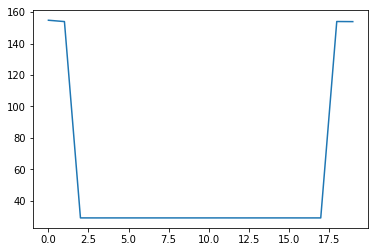

In [11]:
plt_test.plot(testY[2])
plt_test.show()

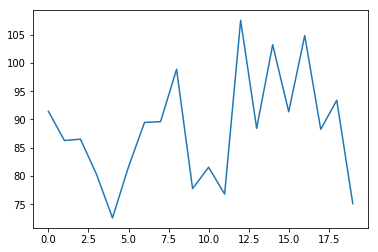

[  91.43117523   86.28890228   86.52313232   80.33608246   72.62326813
   81.63638306   89.47903442   89.6155777    98.87466431   77.79772949
   81.57211304   76.8300705   107.52159119   88.436203    103.20435333
   91.36345673  104.82751465   88.26694489   93.39090729   75.14550018]


In [12]:
plt_test.plot(testPredict[2])
plt_test.show()
print(testPredict[2])